# Exploratory Data Analysis(EDA) with Titanic Data Set
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

* To take a closer look at the data take help of `.head()` function of pandas library which returns first five observations of the data set.Similarly `.tail()` returns last five observations of the data set.
* To found out the total number of rows and columns in the data set using `.shape`.
* To see label of each columns in the data set using `.columns.values`
* It is also a good practice to know the columns and their corresponding data types,along with finding whether they contain null values or not with `.info()`
* The `.describe()` function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.
* Few key insights just by looking at dependent variable are as follows:
    * `.column.unique()`
    * `.column.value_counts()`
* To chech missing values in the data set's columns using `.isnull().sum()`
* To use `linear regression` for modelling, its necessary to remove correlated variables to improve your model.One can find correlations using pandas `.corr()` function and can visualize the correlation matrix using a heatmap in seaborn.
    * Dark shades represents positive correlation while lighter shades represents negative correlation.
    * If you set annot=True, you’ll get values by which features are correlated to each other in grid-cells.
    * It’s a good practice to remove correlated variables during feature selection.
* To check `Outliers`: `A box plot` (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.
* To check `the linearity of the variables` it is a good practice to `plot distribution graph` and look for skewness of features. Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution.

In [1]:
%load_ext lab_black

In [2]:
# This librarys is to work with matrices
import pandas as pd

# This librarys is to work with vectors
import numpy as np

# This library is to create some graphics algorithmn
import seaborn as sns

# to render the graphs
import matplotlib.pyplot as plt

# import module to set some ploting parameters
from matplotlib import rcParams

# Library to work with Regular Expressions
import re

# to ignore filterwarnings
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

# This library is to create image
from IPython.display import Image

# These libraries are to call them from my functions
from util_reporting import (
    swarmplot_viz,
    crosstab_viz,
    factor_plot_viz,
    relationship_viz,
    df_first_look,
    df_descriptive_statistics,
    countplot_viz,
    df_pivot_aggregated_statistics,
    multiple_plot_viz,
    boxplot_viz,
    histogram_viz,
    distplot_viz,
)

# These libraries are to call them from my functions
from util_data_cleaning import (
    extract_first_string,
    df_numeric_column_filler_with_aggregated_data,
)

# This function makes the plot directly on browser
%matplotlib inline

%config Completer.use_jedi = False

# Seting a universal figure size
rcParams["figure.figsize"] = 8, 6

## Data Understanding:
### Data Dictionary:

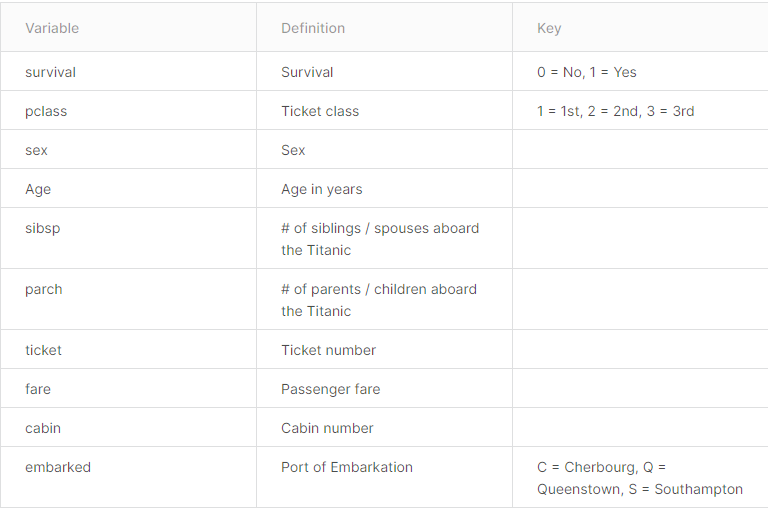

In [3]:
Image(filename="data_dict.png")

In [4]:
# Loading data set:
df_train = pd.read_csv("train.csv")

### The First Looking to Data Set:
* I called `df_first_look` from my function. You can check `util_reporting.py` file on my GitHub. 
* This function turns;
    * First 5 rows of dataframe
    * Last 5 rows of dataframe
    * Row count of dataframe
    * Column count of dataframe
    * List of columns in the dataframe
    * Looking NaN values and datatypes of columns in the dataframe

In [5]:
df_first_look(df_train)

First 5 rows of dataframe:
--------------------------
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  


<AxesSubplot:>

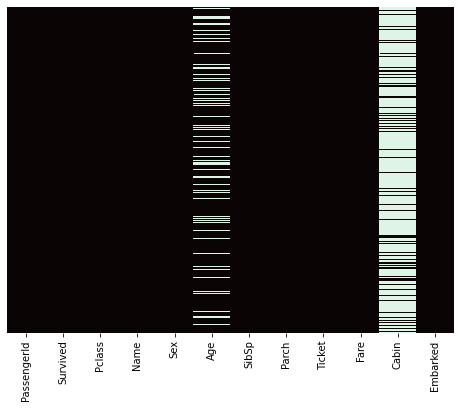

In [6]:
# To see missing values with heatmap:

sns.heatmap(df_train.isnull(), cbar=False, yticklabels=False, cmap="mako")

## Data Data Wrangling:
### To Extract Appellation from Names:

* This cell extracts appellations from Name column and create a new column with appellations. 

In [7]:
df_train["Appellation"] = df_train["Name"].str.extract("([A-Za-z]+)\.")

* I called `countplot_viz` from my function. You can check `util_reporting.py` file on my GitHub.
* This function does;
    * This function visualizes a countplot.

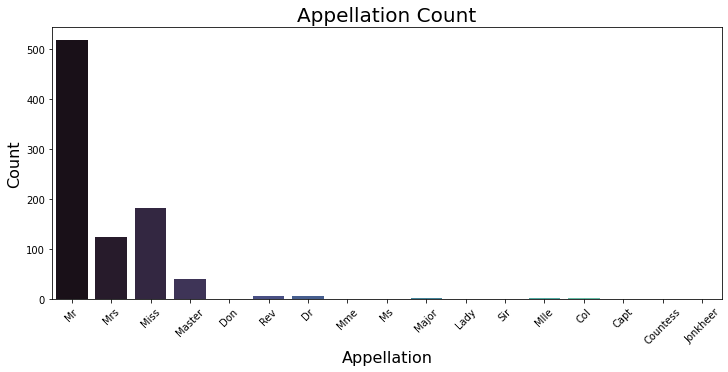

In [8]:
countplot_viz(df_train, "Appellation", "Appellation", "Count", "Appellation Count")

##### How Can Read The Graph: 
* This graph shows count of non-replaced appellations. 
* x column represents Appelations, y column shows counts of Appelations.

##### Observation:
* There are lots of spelling mistake at the column. 
* We can change wrong names and categorize some names. 

##### For Extracting:
* I called `extract_first_string` from my function. You can check `util_data_cleaning.py` file on my GitHub.
* This function does;
    * Extracting the middle string from name column in the dataframe.
    * Replacing values with correct values in new column.

In [9]:
df_train = extract_first_string(df_train, "Name", "Appellation")

In [10]:
df_train.Appellation.value_counts()

Mr         520
Miss       186
Mrs        127
Master      40
Officer     18
Name: Appellation, dtype: int64

##### Observation:
* We changed wrong names.
* We categorized some names as "Officer". 
* After all changing, The column is readable. 

### To Fill Missing Values:
#### Age Column:

In [11]:
# To see count of rows and count of missing values of Age column:

print("Count of full rows of Age column:", df_train["Age"].count())
print("Count of missing rows of Age column:", df_train["Age"].isnull().sum())

Count of full rows of Age column: 714
Count of missing rows of Age column: 177


* %20 of Age column rows are missing. 

##### How Can Fill Missing Values (NaN)? 
* We can fill as appellation of People for example;
    * `df_train.groupby('appellation')['Age'].mean()` To check the average age by appellation.
    * `df_train.loc[(df_train.Age.isnull())&(df_train.appellation == 'Mr'),'Age']=33`   Assigning the NaN Values with the found values of the mean ages (We do it for each appellation) 
    * I don't choose this option. Because I have to prepare same line for each appellation again and again.


* We can add some condition for doing specific filling. To group the median age by sex, pclass and title, to have any idea and maybe input in Age NaN's: 
    * `df_train.groupby(["Sex","Pclass","appellation"])["Age"]` We can fill by sex, class of tickets and appellations.  
    * `df_train.loc[df_train.Age.isnull(), 'Age'] = df_train.groupby(['Sex','Pclass','appellation']).Age.transform('median')` Using the groupby to transform this variables
    

* We can create `a function` with this formulation. Also we can use it at other columns that have missing values or we can use it at future projects.   

##### To Have any Idea for Input in NaNs of Age Column with "df_pivot_aggregated_statistics" Function:
* I called `df_pivot_aggregated_statistics` from my function. You can check `util_reporting.py` file on my GitHub.
* This function does;
    * Gets a Python Pandas dataframe and calculating aggregation by columns in the dataframe.
    * We look mean and median values of columns for using filling NaN values of Age column. 

In [12]:
column_list = ["Sex", "Pclass", "Appellation"]
descriptive_statistic_list = ["mean", "median"]
df_pivot_aggregated_statistics(df_train, column_list, "Age", descriptive_statistic_list)

                            mean  median
Sex    Pclass Appellation               
female 1      Miss         29.62    29.5
              Mrs          40.86    41.5
              Officer      49.00    49.0
       2      Miss         22.56    24.0
              Mrs          33.68    32.0
       3      Miss         16.12    18.0
              Mrs          33.52    31.0
male   1      Master        5.31     4.0
              Mr           41.61    40.0
              Officer      51.12    51.0
       2      Master        2.26     1.0
              Mr           32.77    31.0
              Officer      42.00    46.5
       3      Master        5.35     4.0
              Mr           28.72    26.0


##### To Fill NaNs Values:
* I called `df_numeric_column_filler_with_aggregated_data` from my function. You can check `util_data_cleaning.py` file on my GitHub.
* This function does;
    * Gets a Python Pandas dataframe and filling missing values in the column of the dataframe.
    * It works like at above cell and fills all NaN rows with median values of columns. 

In [13]:
column_list = ["Sex", "Pclass", "Appellation"]
df_train = df_numeric_column_filler_with_aggregated_data(df_train, column_list, "Age")

In [14]:
# To see count of rows and count of missing values of Age column:

print("Count of full rows of Age column:", df_train["Age"].count())
print("Count of missing rows of Age column:", df_train["Age"].isnull().sum())

Count of full rows of Age column: 891
Count of missing rows of Age column: 0


### Changing Categorical Column's Values: 
#### Survived Column:

* Survived column has two categories: 0 and 1. Sinse this are coded numericaly it is not easy to understand which value equal to which label. So I'm coding new values: `1 = "survived", 0 = "died"`. 

In [15]:
df_train["Survived_"] = np.where(df_train["Survived"] == 1, "survived", "died")

In [16]:
df_train["Survived_"].value_counts()

died        549
survived    342
Name: Survived_, dtype: int64

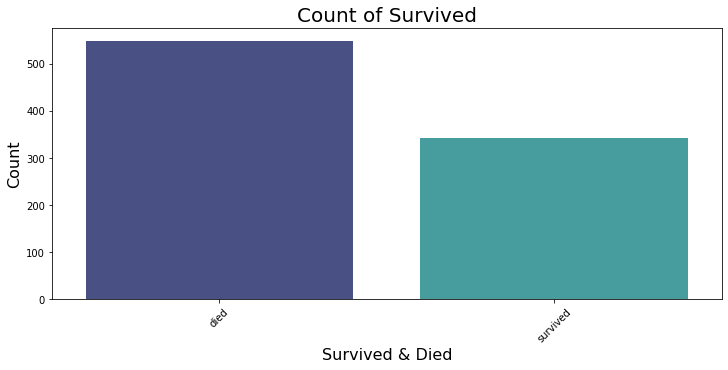

In [17]:
countplot_viz(df_train, "Survived_", "Survived & Died", "Count", "Count of Survived")

##### How Can Read The Graph: 
* This graph shows count of survived or died people. 
* x column shows situations, y column shows counts of situations.

##### Observation:
* We changed categorical names as Survived and Died.
* Count of died people more than count of survived people. 

## Understanding Variables:
### Independent Variables:
#### Pclass:

* `Definition:` Pclass column shows the ticket class of passangers.
* `Categories & Labels:` 1 = 1st, 2 = 2nd, 3 = 3rd

In [18]:
df_train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

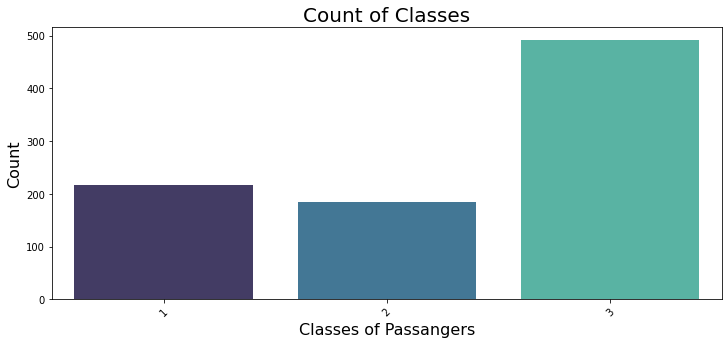

In [19]:
countplot_viz(df_train, "Pclass", "Classes of Passangers", "Count", "Count of Classes")

##### How Can Read The Graph: 
* This graph shows count of passangers' ticket classes. 
* x column shows classes, y column shows counts of classes.

##### Observation:
* All Classes have passangers. 
* Most of passanger has 3rd class ticket.  
* Counts of 1st and 2nd class are closely each other. 

#### Age :

* `Definition:` Age column shows the ages of passangers. 
* Age column had 177 NaN value rows. We filled all of them at the above cells.  


* I called `df_descriptive_statistics` from my function. You can check `util_reporting.py` file on my GitHub.
* This function does;
    * Gets a Python Pandas dataframe and list of columns to visualize descriptive statistics about those columns.

In [20]:
list_of_column_descriptive = ["Age"]
df_descriptive_statistics(df_train, list_of_column_descriptive)

Descriptive Statisctics for column:
--------------------------
               Age
count  891.000000
mean    29.151145
std     13.506740
min      0.420000
25%     21.000000
50%     26.000000
75%     36.750000
max     80.000000

Mode values for column:
--------------------------
     Age
0  26.0



* I called `boxplot_viz` from my function. You can check `util_reporting.py` file on my GitHub.
* This function does;
    * This function visualizes a boxplot for a column.

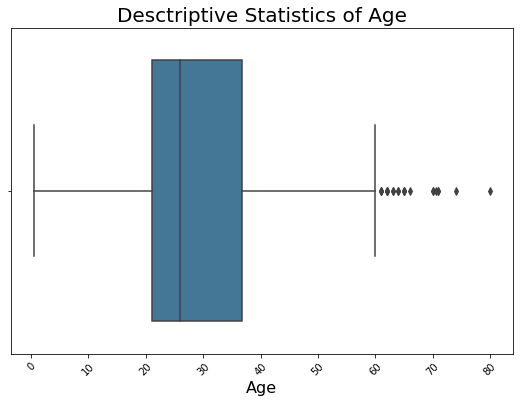

In [21]:
boxplot_viz(df_train, "Age", xlabel="Age", title="Desctriptive Statistics of Age")

##### How Can Read The Graph: 
* This graph shows description statistics of Age column. 
* `The minimum` (the smallest number in the data set). The minimum is shown at the far left of the chart, at the end of the left “whisker.”
* `First quartile`, Q1, is the far left of the box (or the far right of the left whisker).
* `The median` is shown as a line in the center of the box.
* `Third quartile`, Q3, shown at the far right of the box (at the far left of the right whisker).
* `The maximum` (the largest number in the data set), shown at the far right of the box.
* Data sets can sometimes contain `outliers` that are suspected to be anomalies (perhaps because of data collection errors or just plain old flukes). If outliers are present, the whisker on the appropriate side is drawn to 1.5 * IQR rather than the data minimum or the data maximum. Small circles or unfilled dots are drawn on the chart to indicate where suspected outliers lie. Filled circles are used for known outliers.

# Z score haesaplaması gelecek ama kütüphaneyi indirmedim henüz.

##### Observation:
* Avg age and median-mode are so closely. Distribution is right skewed (positive skew). Avg passengers age shows that most of passenger is young.
* There are outliers in the column values.


#### Fare:

* `Definition:` Age column shows the ages of passangers. 
    
* I called `df_descriptive_statistics` from my function. You can check `util_reporting.py` file on my GitHub.
    * This function does;
    * Gets a Python Pandas dataframe and list of columns to visualize descriptive statistics about those columns.

In [22]:
list_of_column_descriptive = ["Fare"]
df_descriptive_statistics(df_train, list_of_column_descriptive)

Descriptive Statisctics for column:
--------------------------
              Fare
count  891.000000
mean    32.204208
std     49.693429
min      0.000000
25%      7.910400
50%     14.454200
75%     31.000000
max    512.329200

Mode values for column:
--------------------------
    Fare
0  8.05



* I called `boxplot_viz` from my function. You can check `util_reporting.py` file on my GitHub.
* This function does;
    * This function visualizes a boxplot for a column.

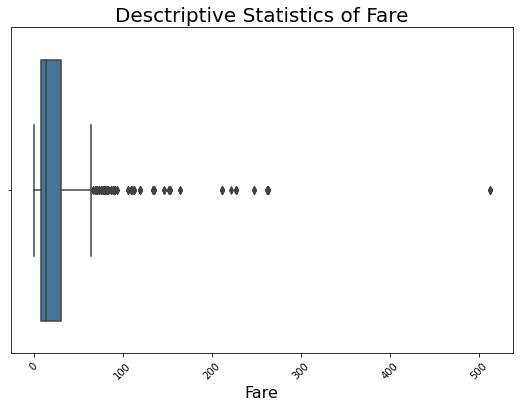

In [23]:
boxplot_viz(df_train, "Fare", xlabel="Fare", title="Desctriptive Statistics of Fare")

##### How Can Read The Graph: 
* This graph shows description statistics of Age column. 
* `The minimum` (the smallest number in the data set). The minimum is shown at the far left of the chart, at the end of the left “whisker.”
* `First quartile`, Q1, is the far left of the box (or the far right of the left whisker).
* `The median` is shown as a line in the center of the box.
* `Third quartile`, Q3, shown at the far right of the box (at the far left of the right whisker).
* `The maximum` (the largest number in the data set), shown at the far right of the box.
* Data sets can sometimes contain `outliers` that are suspected to be anomalies (perhaps because of data collection errors or just plain old flukes). If outliers are present, the whisker on the appropriate side is drawn to 1.5 * IQR rather than the data minimum or the data maximum. Small circles or unfilled dots are drawn on the chart to indicate where suspected outliers lie. Filled circles are used for known outliers.

##### Observation:
* Avg fare and median-mode are not closely. Distribution is right skewed (positive skew). Avg passengers fare shows that most of passenger took cheaper ticket.
* There are outliers in the column values. Because of first class ticket's fare, outliers happened. 

#### Sex:

* `Definition:` Sex column shows the gender of passangers.
* `Categories & Labels:` male, female

In [24]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

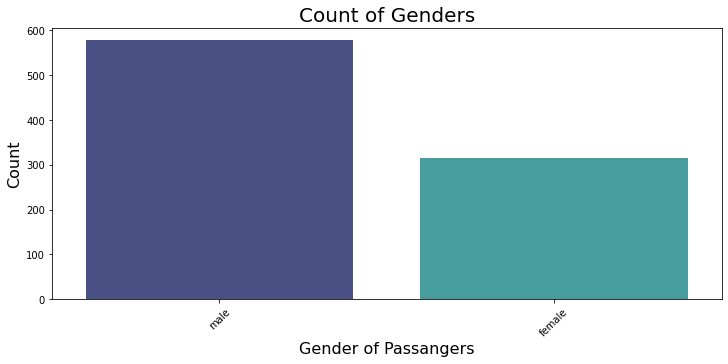

In [25]:
countplot_viz(df_train, "Sex", "Gender of Passangers", "Count", "Count of Genders")

##### How Can Read The Graph: 
* This graph shows count of passangers' genders. 
* x column shows genders, y column shows counts of gender.

##### Observation:
* Gender is stated for all passangers. So there is no any NaN values at Sex column.  
* Counts of male passangers more than female passangers. 

#### Appellation:

* `Definition:` Appellation column shows the title of passangers.
* There were lots of spelling mistake at the column. We changed wrong names and categorize some names at the above cells.  
* `Categories & Labels:` Mr, Miss,Mrs, Master, Officer

In [26]:
df_train.Appellation.value_counts()

Mr         520
Miss       186
Mrs        127
Master      40
Officer     18
Name: Appellation, dtype: int64

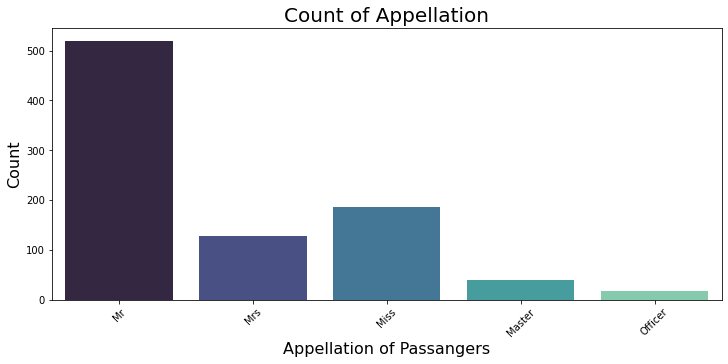

In [27]:
countplot_viz(
    df_train,
    "Appellation",
    "Appellation of Passangers",
    "Count",
    "Count of Appellation",
)

##### How can read the Graph: 
* This graph shows count of replaced appellations. 
* x column represents Appelations, y column shows counts of Appelations.

##### Observation:
* As we saw at sex column, counts of male passangers more than female passangers. 
* There are children and employees. 

#### Embarked:

* `Definition:` Embarked column shows the port of Embarkation.
* `Categories & Labels:` C = Cherbourg, Q = Queenstown, S = Southampton

In [28]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

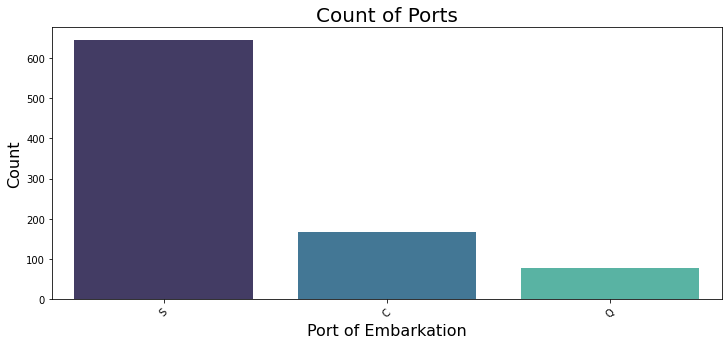

In [29]:
countplot_viz(df_train, "Embarked", "Port of Embarkation", "Count", "Count of Ports")

##### How can read the Graph: 
* This graph shows count of Port of Embarkation. 
* x column represents Ports, y column shows counts of Ports.

##### Observation:
* Most of passangers boarded The Titanic from Southampton. 

#### SibSp:

* `Definition:` This feature represents whether a person is alone or with his family members.
* `Categories & Labels:`
    * Sibling = brother, sister, stepbrother, stepsister
    * Spouse = husband, wife
    * 0,1,2,3,4,5,6,7,8 = Number of family person 

In [30]:
df_train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

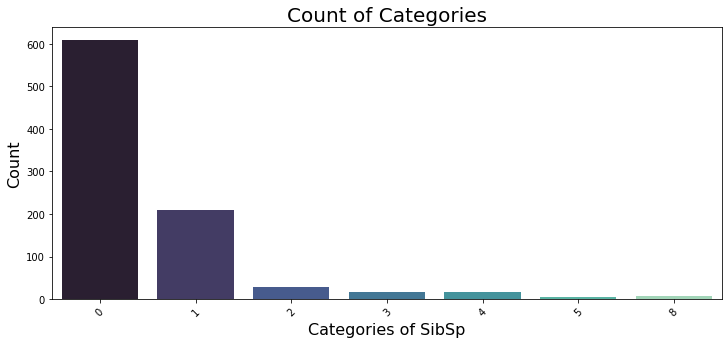

In [31]:
countplot_viz(df_train, "SibSp", "Categories of SibSp", "Count", "Count of Categories")

##### How can read the Graph: 
* This graph shows count of Sibling/Spouse. 
* x column represents categories of Sibling/Spouse, y column shows counts of categories.

##### Observation:
* Most of passangers who boarded The Titanic had not Sibling/Spouse. 
* In other passangers, most of passanger has one sibling or spouse.

#### Parch:

* `Definition:` This feature represents whether a person is alone or with his family members.
* `Categories & Labels:`
    * Parent = mother, father
    * Child = daughter, son, stepdaughter, stepson
    * Some children travelled only with a nanny, therefore parch=0 for them.
    * 0,1,2,3,4,5,6 = Number of family person 

In [32]:
df_train.Parch.value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

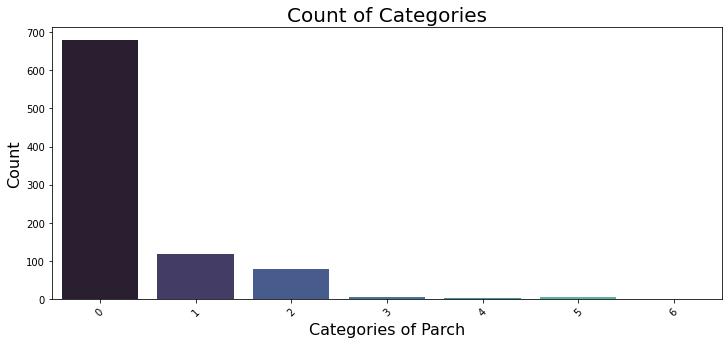

In [33]:
countplot_viz(df_train, "Parch", "Categories of Parch", "Count", "Count of Categories")

##### How can read the Graph: 
* This graph shows count of Parent/Child. 
* x column represents categories of Parent/Child, y column shows counts of categories.

##### Observation:
* Most of passangers who boarded The Titanic had not parent or child
* In other passangers, most of passanger has one or two parent/child. 

### Target Variables:
#### Survived:

* `Definition:` Survived column shows passangers were survived or died.
* `Categories & Labels:` 0= Died, 1= Survived

In [34]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

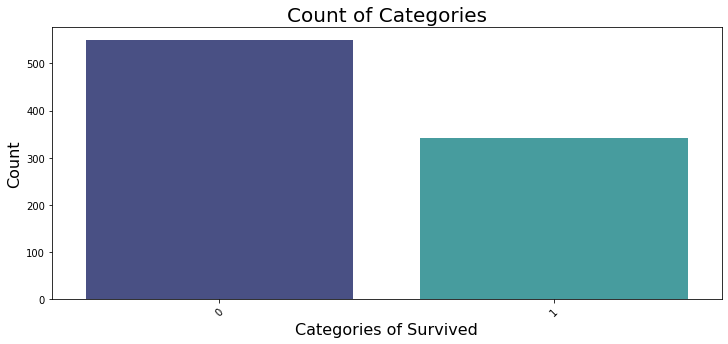

In [35]:
countplot_viz(
    df_train, "Survived", "Categories of Survived", "Count", "Count of Categories"
)

##### How Can Read The Graph: 
* This graph shows count of survived or died people. 
* x column shows situations, y column shows counts of situations.

##### Observation:
* Count of died people more than count of survived people. 

## Bivariate Relationships:

### Age & Survided: 

* I called `distplot_viz` from my function. You can check `util_reporting.py` file on my GitHub.
* This function does;
    * Gets a Python Pandas dataframe and visualize displot by a column's conditions. 
    * It shows density of column. 

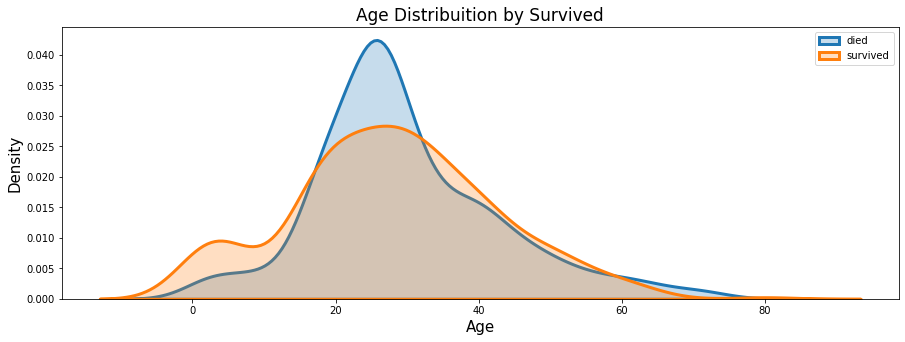

In [36]:
distplot_viz(
    data=df_train,
    column="Age",
    separate_column="Survived_",
    condition_1="died",
    condition_2="survived",
    label1="died",
    label2="survived",
    title="Age Distribuition by Survived",
    color1="blue",
    color2="red",
)

##### How Can Read The Graph: 
* This graph shows distribution of age column by survived column. 
* x column shows distribution of age, y column shows density.

* I called `histogram_viz` from my function. You can check `util_reporting.py` file on my GitHub.
* This function does;
    * Gets a Python Pandas dataframe and visualize histogram by a column's conditions.

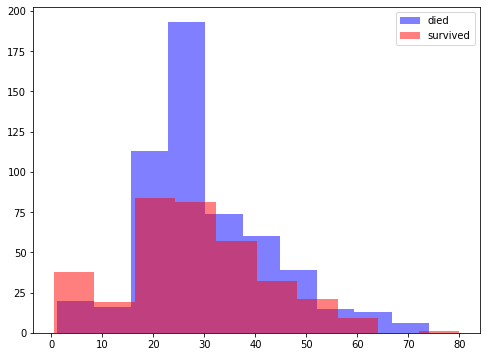

In [37]:
histogram_viz(
    data=df_train,
    column="Age",
    separate_column="Survived_",
    condition_1="died",
    condition_2="survived",
    label1="died",
    label2="survived",
    color1="blue",
    color2="red",
)

##### How Can Read The Graph: 
* These graphs show count of survived and died passangers' age. 
* x column shows ages of passangers, y column shows frequency of Ages.

##### Observations:
* Age Distribuition by Survived: 
    * Density axis shows most of died passangers' age are at 25-30 age scale. 
    * Density axis is extensive at survived passangers. it shows most of Survived passangers age are at 18-40 age scale. 
* Multiple Plot (Died & Survived):
    * The age<5 were survived in large numbers(The Women and Child First Policy).
    * The group of between 17 and 36 were saved in large numbers. 
    * The oldest Passenger was saved(80 years).
    * Maximum number of deaths were in the age group of 23-27.

### Fare & Survived:

* I called `distplot_viz` from my function. You can check `util_reporting.py` file on my GitHub.
* This function does;
    * Gets a Python Pandas dataframe and visualize displot by a column's conditions. 
    * It shows density of column. 

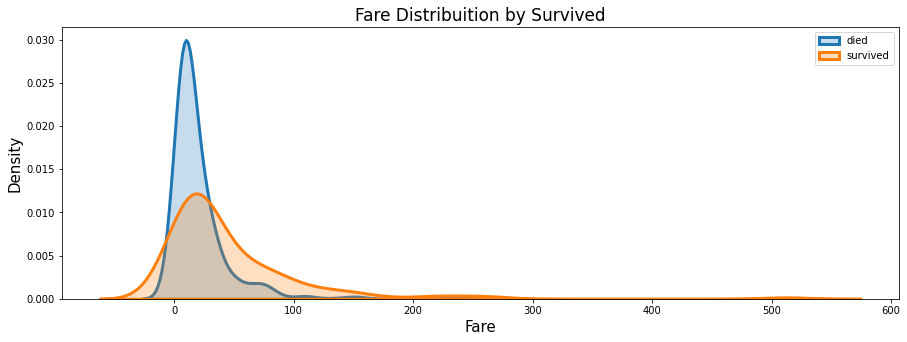

In [38]:
distplot_viz(
    data=df_train,
    column="Fare",
    separate_column="Survived_",
    condition_1="died",
    condition_2="survived",
    label1="died",
    label2="survived",
    title="Fare Distribuition by Survived",
    color1="blue",
    color2="red",
)

##### How Can Read The Graph: 
* This graph shows distribution of fare column by survived column. 
* x column shows distribution of fare, y column shows density.

* I called `histogram_viz` from my function. You can check `util_reporting.py` file on my GitHub.
* This function does;
    * Gets a Python Pandas dataframe and visualize histogram by a column's conditions.

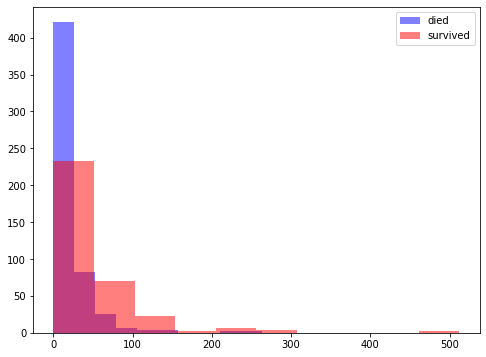

In [39]:
histogram_viz(
    data=df_train,
    column="Fare",
    separate_column="Survived_",
    condition_1="died",
    condition_2="survived",
    label1="died",
    label2="survived",
    color1="blue",
    color2="red",
)

##### How Can Read The Graph: 
* This graph shows distribution of fare column by survived column. 
* x column shows distribution of fare, y column shows density.

##### Observations:
* Fare Distribuition by Survived: 
    * Density axis shows most of died passangers' fare of tickets are cheapest. 
    * Density axis is extensive at survived passangers. As we see, People has survived who had most expensive fare tickets.   
* Multiple Plot (Died & Survived):
    * The most of died is fare<25. 
    * The number of deaths is lower in people who pay high fares.
    * The majority of rescued people were in the fare<100 group We can attribute this to the fact that there are more people in that group.

### Sex & Survived: 

In [40]:
pd.crosstab(df_train.Survived, df_train.Sex, margins=True).style.background_gradient(
    cmap="mako"
)

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


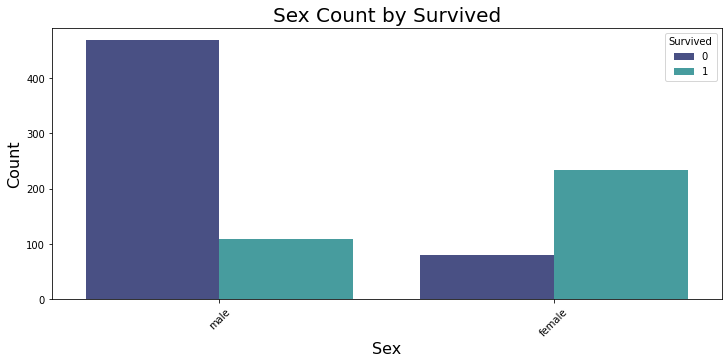

In [41]:
countplot_viz(
    df_train,
    "Sex",
    "Sex",
    "Count",
    "Sex Count by Survived",
    hue="Survived",
)

##### How Can Read The Graph: 
* This graph shows count of survived or died people by their gender. 
* x column shows genders, y column shows counts of gender by Survived.

##### Observation:
* Because of The Women and Child First Policy, women survived more than men. 
* %26 of women dead, %74 of women was survived. 
* %81 of men dead, %19 of men was survived. 

### Appellation & Survived:

In [42]:
pd.crosstab(
    df_train.Survived, df_train.Appellation, margins=True
).style.background_gradient(cmap="mako")

Appellation,Master,Miss,Mr,Mrs,Officer,All
Survived,,,,,,
0,17,55,438,26,13,549
1,23,131,82,101,5,342
All,40,186,520,127,18,891


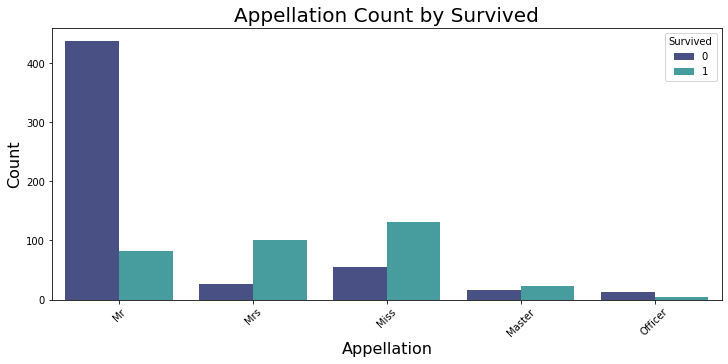

In [43]:
countplot_viz(
    df_train,
    "Appellation",
    "Appellation",
    "Count",
    "Appellation Count by Survived",
    hue="Survived",
)

##### How Can Read The Graph: 
* This graph shows count of survived or died people by class of appellation of passangers. 
* x column shows appellations, y column shows counts of appellation of passangers by Survived.

##### Observations:
* This charts confirmed us about women and children survived more than men.

### Pclass & Survived:

In [44]:
pd.crosstab(df_train.Survived, df_train.Pclass, margins=True).style.background_gradient(
    cmap="mako"
)

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


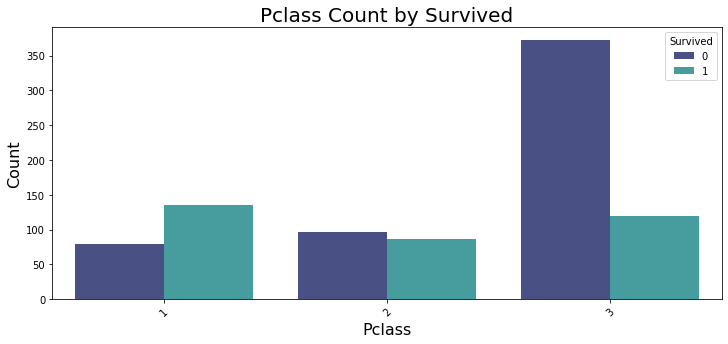

In [45]:
countplot_viz(
    df_train,
    "Pclass",
    "Pclass",
    "Count",
    "Pclass Count by Survived",
    hue="Survived",
)

##### How Can Read The Graph: 
* This graph shows count of survived or died people by class of passangers' ticket. 
* x column shows class of tickets, y column shows counts of class of tickets by Survived.

##### Observation:
* We can see the discrimination between classes. First class more survived than third class.  
* Death rate by class:
    * %67,75 third class
    * %17,66 second class
    * %14,59 first class 
* Survived rate by class:
    * %34,80 third class
    * %25,43 second class
    * %39,76 first class

### Embarked & Survived:

In [46]:
pd.crosstab(
    df_train.Survived, df_train.Embarked, margins=True
).style.background_gradient(cmap="mako")

Embarked,C,Q,S,All
Survived,,,,
0,75,47,427,549
1,93,30,217,340
All,168,77,644,889


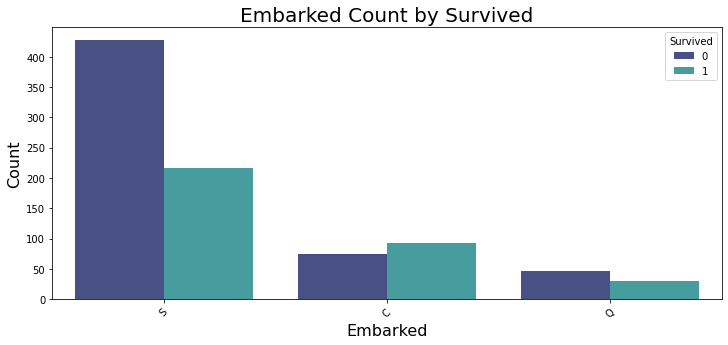

In [47]:
countplot_viz(
    df_train,
    "Embarked",
    "Embarked",
    "Count",
    "Embarked Count by Survived",
    hue="Survived",
)

##### How Can Read The Graph: 
* This graph shows count of survived or died people by port of embarkation. 
* x column shows ports, y column shows count of ports by Survived.

##### Observations:
* Death rate by Port of Embarkation:
    * %8,56 C = Cherbourg, France
    * %13,67 Q = Queenstown,Ireland
    * %77,77 S = Southampton, England


* Survived rate of Ports: 
    * %55,36 of Cherbourg passangers were survived.
    * %38,96 of Queenstown passangers were survived.
    * %33,70 of Southampton passangers were survived.
    * The chances for survival for Port C is highest around 0.55 while it is lowest for S.

### SibSp(Sibling/Spouse) & Survived:

In [48]:
pd.crosstab(df_train.Survived, df_train.SibSp, margins=True).style.background_gradient(
    cmap="mako"
)

SibSp,0,1,2,3,4,5,8,All
Survived,,,,,,,,
0,398,97,15,12,15,5,7,549
1,210,112,13,4,3,0,0,342
All,608,209,28,16,18,5,7,891


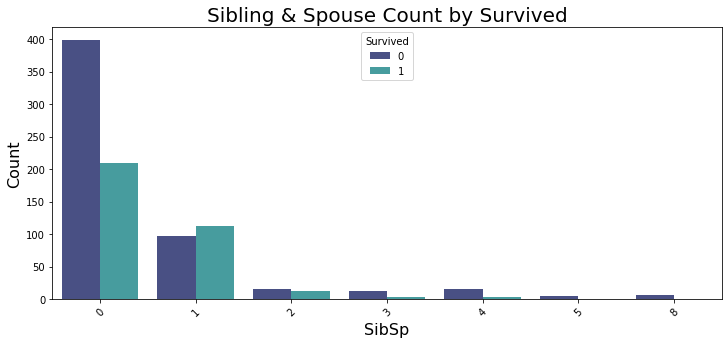

In [49]:
countplot_viz(
    df_train,
    "SibSp",
    "SibSp",
    "Count",
    "Sibling & Spouse Count by Survived",
    hue="Survived",
)

##### How Can Read The Graph: 
* This graph shows survived or died people's count of Sibling & Spouse. 
* x column shows Sibling & Spouse count, y column shows count of Sibling & Spouse by Survived.

##### Observation:
* %68,17 of passengers had not sibling and spouse.
* %61,17 of survived passengers were alone. %34,21 of alone passengers were survived. 
* If person have 1 or 2 family member, survived chance increase. But if they have more family member, survived chance decrease. Probably they tried to save all of them but they didn't it. 

### Parch(Parents/Children) & Survived:

In [50]:
pd.crosstab(df_train.Survived, df_train.Parch, margins=True).style.background_gradient(
    cmap="mako"
)

Parch,0,1,2,3,4,5,6,All
Survived,,,,,,,,
0,445,53,40,2,4,4,1,549
1,233,65,40,3,0,1,0,342
All,678,118,80,5,4,5,1,891


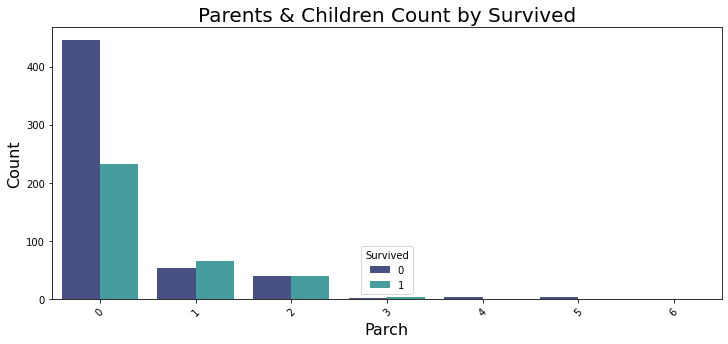

In [51]:
countplot_viz(
    df_train,
    "Parch",
    "Parch",
    "Count",
    "Parents & Children Count by Survived",
    hue="Survived",
)

##### How Can Read The Graph: 
* This graph shows survived or died people's count of Parents & Children. 
* x column shows Parents & Children count, y column shows count of Parents & Children by Survived.

##### Observation:
* %76,09 of passengers had not any parent or child.
* %68,12 of survived passengers were alone. %34,36 of alone passengers were survived. 
* If person have 1, 2 or 3 family member, survived chance increase. But if they have more family member, survived chance decrease. Probably they tried to save all of them but they didn't it. It is same with SibSp column. 

## Multivariate Relationships:

### Sex-Pclass & Survived:

* I called `relationship_viz` from my function. You can check `util_reporting.py` file on my GitHub.
* This function does;
    * Gets a Python Pandas dataframe and concats two different graphs that are factorplot and crosstab. 

<Figure size 864x360 with 0 Axes>

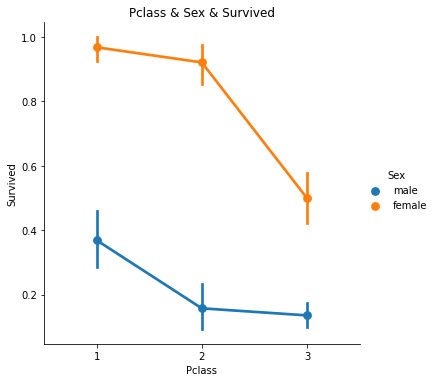

In [52]:
relationship_viz(
    df_train, "Sex", "Survived", "Pclass", title_factor="Pclass & Sex & Survived"
)

##### How Can Read The Graphs: 
* Crosstab shows survived or died people's count by sex and pclass. 
* Factorplot (Point plots) can be more useful than bar plots for focusing comparisons between different levels of one or more categorical variables. They are particularly adept at showing interactions: how the relationship between levels of one categorical variable changes across levels of a second categorical variable. The lines that join each point from the same hue level allow interactions to be judged by differences in slope, which is easier for the eyes than comparing the heights of several groups of points or bars.

##### Observations:
* We can see the discrimination between classes. First class more survived than third class.  
* It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate. 
* Women death rate by class:
    * %50 third class
    * %7,89 second class
    * %3,19 first class 
* Men death rate by class:
    * %86,45 third class
    * %84,25 second class
    * %63,11 first class

### Fare-Pclass and Survived:

* I called `swarmplot_viz` from my function. You can check `util_reporting.py` file on my GitHub.
* This function does;
    * Gets a Python Pandas dataframe and visualize a swarmplot for 2 column by a grouping column.

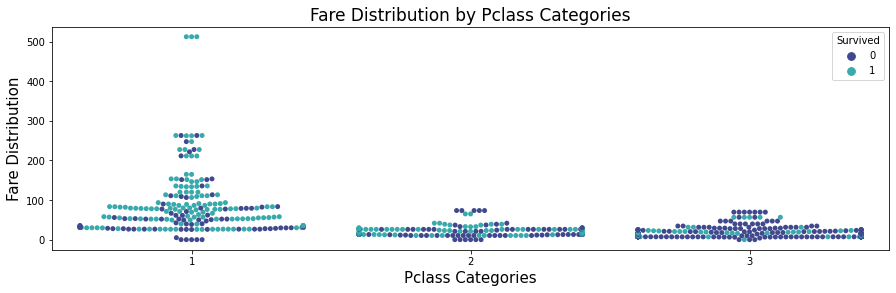

In [53]:
swarmplot_viz(
    df_train,
    "Pclass",
    "Fare",
    "Survived",
    "Pclass Categories",
    "Fare Distribution",
    "Fare Distribution by Pclass Categories",
)

##### How Can Read The Graph: 
* This graph shows fare distribution of survived or died people by ticket class.
* x column shows ticket class categories, y column shows fare distributions.
* All point represents each passanger. 

##### Observation:
* The cheapest ticket fare belong Third class. As we see from blue points count, most of died in this class. 
* The most expensive ticket fare belong first class. 
* Those who paid the highest fares were survived.

## The Correlation of Data Set

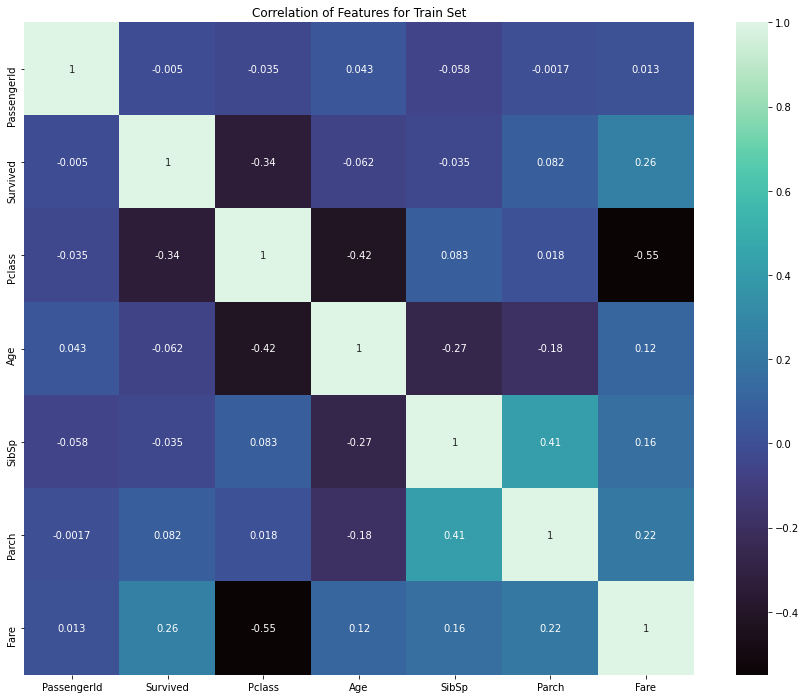

In [54]:
# lets look the correlation of df_train:

plt.figure(figsize=(15, 12))
plt.title("Correlation of Features for Train Set")
sns.heatmap(df_train.corr(), vmax=1.0, annot=True, cmap="mako")
plt.show()

##### How Can Read The Graph: 
* This graph shows correlation of columns in data set.
* x column and y column shows columns of data set. 
* The brighter the color the higher the positive correlation, the darker the color the greater the negative correlation. 
* The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings.
* Correlation coefficient formulas are used to find how strong a relationship is between data. The formulas return a value between -1 and 1, where:
    * 1 indicates a strong positive relationship.
    * -1 indicates a strong negative relationship.
    * A result of zero indicates no relationship at all.

##### Observation:
* From the above heatmap,we can see that the features are not much correlated. 
* The highest positive correlation is between SibSp and Parch i.e 0.41. 
* The highest negative correlation is between Pclass and Fare i.e -0.55. 